# From youtube tutorial: https://www.youtube.com/watch?v=c0k-YLQGKjY

Single variable

Predicting future values of a single variable

In [130]:
import tensorflow as tf 
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
directory = '/Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/'
dataFiles = [f for f in listdir(directory) if isfile(join(directory, f))] 
for file in dataFiles:
    print(file)
    df = pd.read_csv(directory + file)

#for now, I will only use SF data 
location = '_SF'
df = pd.read_csv(directory + dataFiles[3])
df

SAC-NOAA-and-Megawatts.csv
SD-NOAA-and-Megawatts.csv
SD-yearAvg-NOAA-and-Megawatts.csv
SF-NOAA-and-Megawatts.csv
SAC-yearAvg-NOAA-and-Megawatts.csv
LA-yearAvg-NOAA-and-Megawatts.csv
LA-NOAA-and-Megawatts.csv
SF-yearAvg-NOAA-and-Megawatts.csv


,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
0,01-01T00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
1,01-01T01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2,01-01T02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
3,01-01T03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
4,01-01T04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12-31T19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
8756,12-31T20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
8757,12-31T21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0
8758,12-31T22:00:00,49.8,45.0,54.0,43.4,35.1,50.0,1020.1,1011.5,1027.1,...,48.4,6.6,24.3,209.0,1.1,4.0,18.0,7.0,14.8,275322.0


In [176]:
df['date'] = pd.to_datetime(df['date'], format='%m-%dT%H:%M:%S')
df['date']= df["date"].map(lambda x: x.replace(year=2019))
df.index = df['date']
df

,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
2019-01-01 01:00:00,2019-01-01 01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2019-01-01 02:00:00,2019-01-01 02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
2019-01-01 03:00:00,2019-01-01 03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
2019-01-01 04:00:00,2019-01-01 04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019-12-31 19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
2019-12-31 20:00:00,2019-12-31 20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
2019-12-31 21:00:00,2019-12-31 21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0


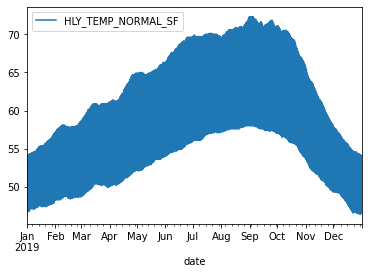

In [177]:
temp = df['HLY_TEMP_NORMAL'+location]
df.plot(x = 'date', y = 'HLY_TEMP_NORMAL'+location)
plt.show()

# LSTM 
- temperature at hour: 1,2,3,4,5 and predict for hour:6
- temperature at hour: 2,3,4,5,6 and predict for hour: 7
- output: y vector - [6] [7] 
- input: x matrix? - [1,2,3,4,5] [2,3,4,5,6]

1. to make it multivariate:
- temperature and clouds at hour: 1,2,3,4,5 and predict for hour:6
- temperature at hour: 2,3,4,5,6 and predict for hour: 7
- output: y vector - [6] [7] 
- input: x matrix? - [[1,cloud1],[2, cloud2],[3,cloud3],[4, cloud4],[5,cloud5] [2,3,4,5,6] etc etc

In [178]:
#make the X data = [1,2,3,4,5] the list of lists with 5 pieces of past data
# make the y data = output prediction
def df_to_X_y(df, window_size= 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ [a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
        

In [205]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((8755, 5, 1), (8755,))

# Train and testing data

- 0.7 training
- 0.1 validation
- 0.2 testing

In [206]:
train_percent = 0.6
validation_percent = 0.2
test_percent = 0.2
train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
test_percent_split = int(test_percent * len(X))

X_train, y_train = X[:train_percent_split], y[:train_percent_split]
X_val, y_val = X[train_percent_split:validation_percent_split], y[train_percent_split:validation_percent_split] #validation
X_test, y_test = X[validation_percent_split:], y[validation_percent_split:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5253, 5, 1), (5253,), (1751, 5, 1), (1751,), (1751, 5, 1), (1751,))

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [208]:
# #model input layer is 24, 1 - shape of data
# #when i apply a new layer, I am increasing complexity of model 
# model = Sequential()
# model.add(LSTM(64, input_shape=(1,4))) #64 = # of units for each layer; 4 = # of features/columns, 1 = timestep
# model.add(Dense(8, 'relu')) #relu to learn non-linear dependencies
# model.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
# model.summary()

In [209]:
model1 = Sequential() #first model's output is the next models input
#from X_train.shape which is 6000, 24, 1
model1.add(InputLayer((5,1))) # 4 = # of features/columns, 1 = timestep
model1.add(LSTM(64))  #64 = # of units for each layer; output is determined by first param, 64 
# dimensionality of the output space????
model1.add(Dense(8, 'relu')) #relu to learn non-linear dependencies
model1.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [210]:
cp = ModelCheckpoint(directory+'model1/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.001), metrics = [RootMeanSquaredError()])


In [211]:
# epochs - each sample in the training dataset has had an opportunity to update the internal model parameters
# callbacks - an object that can perform actions at various stages of training
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 20, callbacks = [cp])

Epoch 1/20
148/165 [=========================>....] - ETA: 0s - loss: 1675.1238 - root_mean_squared_error: 40.9283

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 5s 24ms/step - loss: 1527.2185 - root_mean_squared_error: 39.0796 - val_loss: 264.3600 - val_root_mean_squared_error: 16.2592
Epoch 2/20
152/165 [==========================>...] - ETA: 0s - loss: 40.9290 - root_mean_squared_error: 6.3976

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 40.2175 - root_mean_squared_error: 6.3417 - val_loss: 60.7798 - val_root_mean_squared_error: 7.7961
Epoch 3/20
159/165 [===========================>..] - ETA: 0s - loss: 25.1301 - root_mean_squared_error: 5.0130

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 19ms/step - loss: 24.7332 - root_mean_squared_error: 4.9733 - val_loss: 31.2673 - val_root_mean_squared_error: 5.5917
Epoch 4/20
158/165 [===========================>..] - ETA: 0s - loss: 6.7002 - root_mean_squared_error: 2.5885

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 19ms/step - loss: 6.6015 - root_mean_squared_error: 2.5693 - val_loss: 9.4799 - val_root_mean_squared_error: 3.0789
Epoch 5/20
156/165 [===========================>..] - ETA: 0s - loss: 2.7395 - root_mean_squared_error: 1.6551

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 20ms/step - loss: 2.6985 - root_mean_squared_error: 1.6427 - val_loss: 4.9691 - val_root_mean_squared_error: 2.2291
Epoch 6/20
157/165 [===========================>..] - ETA: 0s - loss: 1.4013 - root_mean_squared_error: 1.1837

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 1.3828 - root_mean_squared_error: 1.1759 - val_loss: 3.0951 - val_root_mean_squared_error: 1.7593
Epoch 7/20
150/165 [==========================>...] - ETA: 0s - loss: 0.9126 - root_mean_squared_error: 0.9553

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.9031 - root_mean_squared_error: 0.9503 - val_loss: 2.1687 - val_root_mean_squared_error: 1.4726
Epoch 8/20
155/165 [===========================>..] - ETA: 0s - loss: 0.7435 - root_mean_squared_error: 0.8622

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.7301 - root_mean_squared_error: 0.8544 - val_loss: 2.0066 - val_root_mean_squared_error: 1.4165
Epoch 9/20
155/165 [===========================>..] - ETA: 0s - loss: 0.5824 - root_mean_squared_error: 0.7632

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 0.5802 - root_mean_squared_error: 0.7617 - val_loss: 1.5268 - val_root_mean_squared_error: 1.2356
Epoch 10/20
160/165 [============================>.] - ETA: 0s - loss: 0.4898 - root_mean_squared_error: 0.6999

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.4883 - root_mean_squared_error: 0.6988 - val_loss: 1.1440 - val_root_mean_squared_error: 1.0696
Epoch 11/20
160/165 [============================>.] - ETA: 0s - loss: 0.4353 - root_mean_squared_error: 0.6598

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 23ms/step - loss: 0.4331 - root_mean_squared_error: 0.6581 - val_loss: 0.9468 - val_root_mean_squared_error: 0.9730
Epoch 12/20
150/165 [==========================>...] - ETA: 0s - loss: 0.3892 - root_mean_squared_error: 0.6239

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 19ms/step - loss: 0.3901 - root_mean_squared_error: 0.6246 - val_loss: 0.8332 - val_root_mean_squared_error: 0.9128
Epoch 13/20
154/165 [===========================>..] - ETA: 0s - loss: 0.3697 - root_mean_squared_error: 0.6080

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 0.3662 - root_mean_squared_error: 0.6052 - val_loss: 0.8227 - val_root_mean_squared_error: 0.9070
Epoch 14/20
165/165 [==============================] - 1s 3ms/step - loss: 0.3558 - root_mean_squared_error: 0.5965 - val_loss: 0.8471 - val_root_mean_squared_error: 0.9204
Epoch 15/20
165/165 [==============================] - 1s 4ms/step - loss: 0.3246 - root_mean_squared_error: 0.5698 - val_loss: 1.0127 - val_root_mean_squared_error: 1.0063
Epoch 16/20
158/165 [===========================>..] - ETA: 0s - loss: 0.3128 - root_mean_squared_error: 0.5592

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.3119 - root_mean_squared_error: 0.5585 - val_loss: 0.6259 - val_root_mean_squared_error: 0.7911
Epoch 17/20
155/165 [===========================>..] - ETA: 0s - loss: 0.2941 - root_mean_squared_error: 0.5423

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.2941 - root_mean_squared_error: 0.5423 - val_loss: 0.5400 - val_root_mean_squared_error: 0.7348
Epoch 18/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2797 - root_mean_squared_error: 0.5289 - val_loss: 0.7352 - val_root_mean_squared_error: 0.8574
Epoch 19/20
165/165 [==============================] - 1s 3ms/step - loss: 0.2646 - root_mean_squared_error: 0.5144 - val_loss: 0.5400 - val_root_mean_squared_error: 0.7348
Epoch 20/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2700 - root_mean_squared_error: 0.5196 - val_loss: 0.6092 - val_root_mean_squared_error: 0.7805


In [212]:
from tensorflow.keras.models import load_model
model1 = load_model(directory+ 'model1/')

In [213]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,47.081478,46.6
1,47.024715,46.6
2,47.161335,46.8
3,47.477604,47.2
4,47.977688,48.9
...,...,...
5248,59.021385,59.9
5249,59.365486,59.5
5250,59.203266,59.1
5251,58.834244,58.7


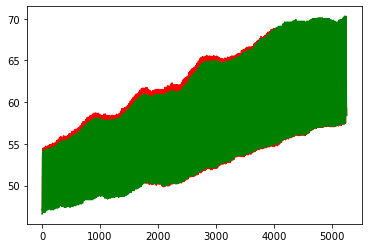

In [214]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:], color = 'red')
plt.plot(train_results['Actuals'][:], color = 'green')

In [215]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,58.206341,58.1
1,57.924030,57.8
2,57.622128,57.6
3,57.486797,57.5
4,57.470119,57.9
...,...,...
1746,59.886166,60.4
1747,59.774693,59.8
1748,59.319382,59.2
1749,58.758533,58.4


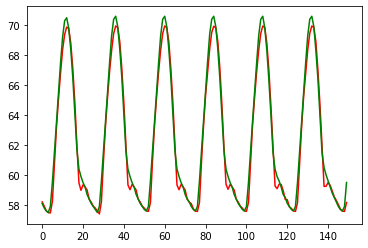

In [216]:
plt.plot(val_results['Val Predictions'][:150], color = 'red')
plt.plot(val_results['Actuals'][:150], color = 'green')

# Part 2 : https://www.youtube.com/watch?v=kGdbPnMCdOg

In [217]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start = 0, end = 100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data = {'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end], color = 'red')
    plt.plot(df['Actuals'][start:end], color = 'green')
    return df, mse(y, predictions)
    

(      Predictions  Actuals
 0       57.331051     57.4
 1       57.096775     56.6
 2       56.062099     56.1
 3       55.680553     55.8
 4       55.556263     55.6
 ...           ...      ...
 1746    51.601536     51.5
 1747    50.992172     51.0
 1748    50.664448     50.5
 1749    50.240597     49.8
 1750    49.486736     49.4
 
 [1751 rows x 2 columns],
 0.29690509745754357)

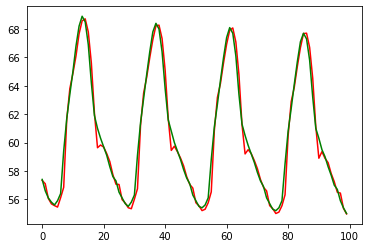

In [218]:
plot_predictions1(model1, X_test, y_test)

In [219]:
model2 = Sequential()
#from X_train.shape which is 6000, 5, 1
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size = 2)) #how many windows do we want to slide across
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 8)                 2056      
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [220]:
cp2 = ModelCheckpoint(directory+ 'model2/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model2.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.001), metrics = [RootMeanSquaredError()])

In [221]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 20, callbacks = [cp2])

Epoch 1/20
154/165 [===========================>..] - ETA: 0s - loss: 889.4326 - root_mean_squared_error: 29.8234 INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 835.1257 - root_mean_squared_error: 28.8985 - val_loss: 15.9605 - val_root_mean_squared_error: 3.9951
Epoch 2/20
121/165 [=====================>........] - ETA: 0s - loss: 10.9268 - root_mean_squared_error: 3.3056INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 10.8632 - root_mean_squared_error: 3.2959 - val_loss: 15.7997 - val_root_mean_squared_error: 3.9749
Epoch 3/20
125/165 [=====================>........] - ETA: 0s - loss: 10.6447 - root_mean_squared_error: 3.2626INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 10.7019 - root_mean_squared_error: 3.2714 - val_loss: 15.5322 - val_root_mean_squared_error: 3.9411
Epoch 4/20
147/165 [=========================>....] - ETA: 0s - loss: 10.4879 - root_mean_squared_error: 3.2385INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 10.5343 - root_mean_squared_error: 3.2457 - val_loss: 15.2612 - val_root_mean_squared_error: 3.9066
Epoch 5/20
144/165 [=========================>....] - ETA: 0s - loss: 10.3429 - root_mean_squared_error: 3.2160INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 10.3288 - root_mean_squared_error: 3.2139 - val_loss: 14.9274 - val_root_mean_squared_error: 3.8636
Epoch 6/20
159/165 [===========================>..] - ETA: 0s - loss: 10.0781 - root_mean_squared_error: 3.1746INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 10.0728 - root_mean_squared_error: 3.1738 - val_loss: 14.5182 - val_root_mean_squared_error: 3.8103
Epoch 7/20
154/165 [===========================>..] - ETA: 0s - loss: 9.8247 - root_mean_squared_error: 3.1344INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 9.8445 - root_mean_squared_error: 3.1376 - val_loss: 14.1011 - val_root_mean_squared_error: 3.7551
Epoch 8/20
158/165 [===========================>..] - ETA: 0s - loss: 9.4560 - root_mean_squared_error: 3.0751INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 9.4958 - root_mean_squared_error: 3.0815 - val_loss: 13.6620 - val_root_mean_squared_error: 3.6962
Epoch 9/20
160/165 [============================>.] - ETA: 0s - loss: 9.1751 - root_mean_squared_error: 3.0290INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 9.1847 - root_mean_squared_error: 3.0306 - val_loss: 13.1742 - val_root_mean_squared_error: 3.6296
Epoch 10/20
158/165 [===========================>..] - ETA: 0s - loss: 8.9177 - root_mean_squared_error: 2.9863INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 8.8834 - root_mean_squared_error: 2.9805 - val_loss: 12.6067 - val_root_mean_squared_error: 3.5506
Epoch 11/20
132/165 [=======================>......] - ETA: 0s - loss: 8.5015 - root_mean_squared_error: 2.9157INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 8.4416 - root_mean_squared_error: 2.9054 - val_loss: 12.1055 - val_root_mean_squared_error: 3.4793
Epoch 12/20
164/165 [============================>.] - ETA: 0s - loss: 8.0702 - root_mean_squared_error: 2.8408INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 8.0645 - root_mean_squared_error: 2.8398 - val_loss: 11.4394 - val_root_mean_squared_error: 3.3822
Epoch 13/20
118/165 [====================>.........] - ETA: 0s - loss: 7.7612 - root_mean_squared_error: 2.7859INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 7.6740 - root_mean_squared_error: 2.7702 - val_loss: 10.9158 - val_root_mean_squared_error: 3.3039
Epoch 14/20
122/165 [=====================>........] - ETA: 0s - loss: 7.1711 - root_mean_squared_error: 2.6779INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 7.1959 - root_mean_squared_error: 2.6825 - val_loss: 10.1860 - val_root_mean_squared_error: 3.1916
Epoch 15/20
114/165 [===================>..........] - ETA: 0s - loss: 6.7283 - root_mean_squared_error: 2.5939INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 6.7077 - root_mean_squared_error: 2.5899 - val_loss: 9.5135 - val_root_mean_squared_error: 3.0844
Epoch 16/20
162/165 [============================>.] - ETA: 0s - loss: 6.2321 - root_mean_squared_error: 2.4964INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 6.2324 - root_mean_squared_error: 2.4965 - val_loss: 8.7532 - val_root_mean_squared_error: 2.9586
Epoch 17/20
138/165 [========================>.....] - ETA: 0s - loss: 5.6721 - root_mean_squared_error: 2.3816INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 5.7052 - root_mean_squared_error: 2.3886 - val_loss: 8.5838 - val_root_mean_squared_error: 2.9298
Epoch 18/20
152/165 [==========================>...] - ETA: 0s - loss: 5.1598 - root_mean_squared_error: 2.2715INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 7ms/step - loss: 5.1695 - root_mean_squared_error: 2.2736 - val_loss: 7.0724 - val_root_mean_squared_error: 2.6594
Epoch 19/20
150/165 [==========================>...] - ETA: 0s - loss: 4.5920 - root_mean_squared_error: 2.1429INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 4ms/step - loss: 4.5994 - root_mean_squared_error: 2.1446 - val_loss: 6.8194 - val_root_mean_squared_error: 2.6114
Epoch 20/20
157/165 [===========================>..] - ETA: 0s - loss: 4.0219 - root_mean_squared_error: 2.0055INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model2/assets


165/165 [==============================] - 1s 5ms/step - loss: 4.0067 - root_mean_squared_error: 2.0017 - val_loss: 5.9201 - val_root_mean_squared_error: 2.4331


(      Predictions  Actuals
 0       58.890503     57.4
 1       58.342361     56.6
 2       57.713749     56.1
 3       57.136295     55.8
 4       56.683701     55.6
 ...           ...      ...
 1746    53.471767     51.5
 1747    52.682697     51.0
 1748    52.019138     50.5
 1749    51.480171     49.8
 1750    50.898312     49.4
 
 [1751 rows x 2 columns],
 3.046847508945856)

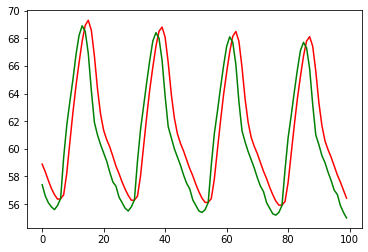

In [222]:
plot_predictions1(model2, X_test, y_test)

In [223]:
model3 = Sequential()
#from X_train.shape which is 6000, 5, 1
model3.add(InputLayer((5,1)))
model3.add(GRU(64)) #how many windows do we want to slide across
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [225]:
cp3 = ModelCheckpoint(directory + 'model3/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model3.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.001), metrics = [RootMeanSquaredError()])
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 20, callbacks = [cp3])

Epoch 1/20
163/165 [============================>.] - ETA: 0s - loss: 6.3067 - root_mean_squared_error: 2.5113

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 5s 23ms/step - loss: 6.2660 - root_mean_squared_error: 2.5032 - val_loss: 2.0321 - val_root_mean_squared_error: 1.4255
Epoch 2/20
153/165 [==========================>...] - ETA: 0s - loss: 0.6183 - root_mean_squared_error: 0.7863

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 3s 19ms/step - loss: 0.6010 - root_mean_squared_error: 0.7752 - val_loss: 0.8295 - val_root_mean_squared_error: 0.9108
Epoch 3/20
164/165 [============================>.] - ETA: 0s - loss: 0.3455 - root_mean_squared_error: 0.5878

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.3455 - root_mean_squared_error: 0.5878 - val_loss: 0.6444 - val_root_mean_squared_error: 0.8027
Epoch 4/20
161/165 [============================>.] - ETA: 0s - loss: 0.2554 - root_mean_squared_error: 0.5054

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.2574 - root_mean_squared_error: 0.5073 - val_loss: 0.4608 - val_root_mean_squared_error: 0.6788
Epoch 5/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2313 - root_mean_squared_error: 0.4810 - val_loss: 0.4972 - val_root_mean_squared_error: 0.7051
Epoch 6/20
165/165 [==============================] - 1s 5ms/step - loss: 0.2208 - root_mean_squared_error: 0.4698 - val_loss: 0.5653 - val_root_mean_squared_error: 0.7519
Epoch 7/20
164/165 [============================>.] - ETA: 0s - loss: 0.2360 - root_mean_squared_error: 0.4858

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 3s 21ms/step - loss: 0.2358 - root_mean_squared_error: 0.4856 - val_loss: 0.3996 - val_root_mean_squared_error: 0.6321
Epoch 8/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2222 - root_mean_squared_error: 0.4714 - val_loss: 0.4756 - val_root_mean_squared_error: 0.6896
Epoch 9/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2019 - root_mean_squared_error: 0.4493 - val_loss: 0.4187 - val_root_mean_squared_error: 0.6470
Epoch 10/20
164/165 [============================>.] - ETA: 0s - loss: 0.2090 - root_mean_squared_error: 0.4572

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 3s 19ms/step - loss: 0.2089 - root_mean_squared_error: 0.4571 - val_loss: 0.3862 - val_root_mean_squared_error: 0.6214
Epoch 11/20
165/165 [==============================] - ETA: 0s - loss: 0.2079 - root_mean_squared_error: 0.4559

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 4s 25ms/step - loss: 0.2079 - root_mean_squared_error: 0.4559 - val_loss: 0.3297 - val_root_mean_squared_error: 0.5742
Epoch 12/20
163/165 [============================>.] - ETA: 0s - loss: 0.2231 - root_mean_squared_error: 0.4723

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 3s 21ms/step - loss: 0.2239 - root_mean_squared_error: 0.4732 - val_loss: 0.3182 - val_root_mean_squared_error: 0.5641
Epoch 13/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2262 - root_mean_squared_error: 0.4756 - val_loss: 0.6287 - val_root_mean_squared_error: 0.7929
Epoch 14/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2050 - root_mean_squared_error: 0.4528 - val_loss: 0.5059 - val_root_mean_squared_error: 0.7112
Epoch 15/20
154/165 [===========================>..] - ETA: 0s - loss: 0.2023 - root_mean_squared_error: 0.4497

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model3/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.2015 - root_mean_squared_error: 0.4489 - val_loss: 0.2903 - val_root_mean_squared_error: 0.5388
Epoch 16/20
165/165 [==============================] - 1s 5ms/step - loss: 0.1918 - root_mean_squared_error: 0.4379 - val_loss: 0.3024 - val_root_mean_squared_error: 0.5499
Epoch 17/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2046 - root_mean_squared_error: 0.4524 - val_loss: 0.4165 - val_root_mean_squared_error: 0.6454
Epoch 18/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2010 - root_mean_squared_error: 0.4483 - val_loss: 0.7356 - val_root_mean_squared_error: 0.8577
Epoch 19/20
165/165 [==============================] - 1s 5ms/step - loss: 0.1997 - root_mean_squared_error: 0.4468 - val_loss: 0.3494 - val_root_mean_squared_error: 0.5911
Epoch 20/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2051 - root_mean_squared_error: 0.4529 - val_loss: 0.3601 - val_root_

(      Predictions  Actuals
 0       57.239841     57.4
 1       57.020241     56.6
 2       55.635010     56.1
 3       55.774208     55.8
 4       55.570797     55.6
 ...           ...      ...
 1746    51.674404     51.5
 1747    51.080715     51.0
 1748    50.798199     50.5
 1749    50.273949     49.8
 1750    49.428955     49.4
 
 [1751 rows x 2 columns],
 0.2500428839538068)

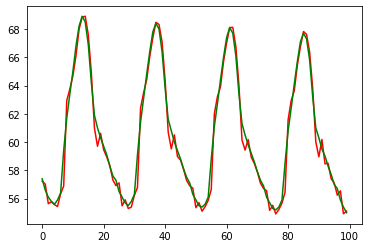

In [226]:
plot_predictions1(model3, X_test, y_test)

In [227]:
temp_df = pd.DataFrame({'Hly_Normal': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df
#seconds starts from a neg number, can make it start from 0 by adding values

,Hly_Normal,Seconds
date,,
2019-01-01 00:00:00,48.8,1.546301e+09
2019-01-01 01:00:00,48.5,1.546304e+09
2019-01-01 02:00:00,47.6,1.546308e+09
2019-01-01 03:00:00,47.2,1.546312e+09
2019-01-01 04:00:00,46.8,1.546315e+09
...,...,...
2019-12-31 19:00:00,51.5,1.577819e+09
2019-12-31 20:00:00,51.0,1.577822e+09
2019-12-31 21:00:00,50.5,1.577826e+09


# circular time

representing in seconds doesn't show how close December 31st is to January 1st. This wraps time around in a circle

In [228]:
day = 60 * 60 * 24 #60 s in a min, 60 min in an hour, 24 hours in a day
year = 365.2425*day #num seconds in a year
temp_df['Day sin'] = np.sin(temp_df['Seconds']*2*(np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*2*(np.pi/day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*2*(np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*2*(np.pi/year))

In [229]:
temp_df

,Hly_Normal,Seconds,Day sin,Day cos,Year sin,Year cos
date,,,,,,
2019-01-01 00:00:00,48.8,1.546301e+09,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,48.5,1.546304e+09,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,47.6,1.546308e+09,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,47.2,1.546312e+09,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,46.8,1.546315e+09,8.660254e-01,0.500000,0.004888,0.999988
...,...,...,...,...,...,...
2019-12-31 19:00:00,51.5,1.577819e+09,-9.659258e-01,0.258819,-0.005734,0.999984
2019-12-31 20:00:00,51.0,1.577822e+09,-8.660254e-01,0.500000,-0.005017,0.999987
2019-12-31 21:00:00,50.5,1.577826e+09,-7.071068e-01,0.707107,-0.004301,0.999991


In [230]:
temp_df = temp_df.drop('Seconds', axis = 1)
temp_df.head()

,Hly_Normal,Day sin,Day cos,Year sin,Year cos
date,,,,,
2019-01-01 00:00:00,48.8,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,48.5,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,47.6,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,47.2,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,46.8,8.660254e-01,0.500000,0.004888,0.999988


In [231]:
# [[[t1,ds1], [t2,ds2], [t3,ds3], [t4,ds4], [t5,ds5]]] [t6]

def df_to_X_y2(df, window_size= 6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)
        

In [232]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((8754, 6, 5), (8754,))

In [233]:
train_percent = 0.6
validation_percent = 0.2
test_percent = 0.2
train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
test_percent_split = int(test_percent * len(X))

X2_train, y2_train = X2[:train_percent_split], y2[:train_percent_split]
X2_val, y2_val = X2[train_percent_split:validation_percent_split], y2[train_percent_split:validation_percent_split]
X2_test, y2_test = X2[validation_percent_split:], y2[validation_percent_split:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((5253, 6, 5), (5253,), (1751, 6, 5), (1751,), (1750, 6, 5), (1750,))

# Preprocessing Data

Normalizing data

In [234]:
temp_train_mean = np.mean(X2_train[:,:,0]) #0 is just temperature in the training test
temp_training_std = np.std(X2_train[:,:,0])

def preprocess(X):
    X[:,:,0] = (X[:,:,0] - temp_train_mean)/temp_training_std
    return X

In [235]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 6.76949281e-01, -8.66025404e-01,  5.00000000e-01,
         -9.52340853e-01,  3.05035898e-01],
        [ 5.68846208e-01, -7.07106781e-01,  7.07106781e-01,
         -9.52121964e-01,  3.05718441e-01],
        [ 4.60743134e-01, -5.00000000e-01,  8.66025404e-01,
         -9.51902586e-01,  3.06400826e-01],
        [ 3.16605702e-01, -2.58819045e-01,  9.65925826e-01,
         -9.51682719e-01,  3.07083054e-01],
        [ 2.08502629e-01, -1.32152666e-12,  1.00000000e+00,
         -9.51462363e-01,  3.07765125e-01],
        [ 1.36433913e-01,  2.58819045e-01,  9.65925826e-01,
         -9.51241518e-01,  3.08447037e-01]],

       [[ 5.68846208e-01, -7.07106781e-01,  7.07106781e-01,
         -9.52121964e-01,  3.05718441e-01],
        [ 4.60743134e-01, -5.00000000e-01,  8.66025404e-01,
         -9.51902586e-01,  3.06400826e-01],
        [ 3.16605702e-01, -2.58819045e-01,  9.65925826e-01,
         -9.51682719e-01,  3.07083054e-01],
        [ 2.08502629e-01, -1.32152666e-12,  1.00000000e+00,
  

In [236]:
model4 = Sequential()
model4.add(InputLayer((6,5))) #six time steps, 5 variables of input
model4.add(LSTM(64)) #how many windows do we want to slide across
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17920     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [259]:
cp4 = ModelCheckpoint(directory+ 'model4/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model4.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.001), metrics = [RootMeanSquaredError()])


In [260]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs = 10, callbacks = [cp4])

Epoch 1/10
161/165 [============================>.] - ETA: 0s - loss: 35.6178 - root_mean_squared_error: 5.9681

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


165/165 [==============================] - 5s 22ms/step - loss: 35.0725 - root_mean_squared_error: 5.9222 - val_loss: 23.9013 - val_root_mean_squared_error: 4.8889
Epoch 2/10
148/165 [=========================>....] - ETA: 0s - loss: 2.6339 - root_mean_squared_error: 1.6229

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


165/165 [==============================] - 4s 24ms/step - loss: 2.4378 - root_mean_squared_error: 1.5614 - val_loss: 4.9127 - val_root_mean_squared_error: 2.2165
Epoch 3/10
152/165 [==========================>...] - ETA: 0s - loss: 0.4095 - root_mean_squared_error: 0.6399

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.3992 - root_mean_squared_error: 0.6318 - val_loss: 2.5542 - val_root_mean_squared_error: 1.5982
Epoch 4/10
165/165 [==============================] - 1s 3ms/step - loss: 0.1769 - root_mean_squared_error: 0.4206 - val_loss: 2.5736 - val_root_mean_squared_error: 1.6042
Epoch 5/10
165/165 [==============================] - 1s 3ms/step - loss: 0.1175 - root_mean_squared_error: 0.3428 - val_loss: 2.5706 - val_root_mean_squared_error: 1.6033
Epoch 6/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0950 - root_mean_squared_error: 0.3083 - val_loss: 2.8223 - val_root_mean_squared_error: 1.6800
Epoch 7/10
152/165 [==========================>...] - ETA: 0s - loss: 0.0905 - root_mean_squared_error: 0.3009

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.0905 - root_mean_squared_error: 0.3008 - val_loss: 2.2724 - val_root_mean_squared_error: 1.5075
Epoch 8/10
165/165 [==============================] - 1s 4ms/step - loss: 0.0836 - root_mean_squared_error: 0.2891 - val_loss: 2.4516 - val_root_mean_squared_error: 1.5658
Epoch 9/10
165/165 [==============================] - 1s 4ms/step - loss: 0.0735 - root_mean_squared_error: 0.2712 - val_loss: 2.2754 - val_root_mean_squared_error: 1.5085
Epoch 10/10
164/165 [============================>.] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2665

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model4/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.0710 - root_mean_squared_error: 0.2665 - val_loss: 1.7985 - val_root_mean_squared_error: 1.3411


(      Predictions  Actuals
 0       54.807800     56.6
 1       53.856045     56.1
 2       53.034775     55.8
 3       52.495010     55.6
 4       52.440041     55.9
 ...           ...      ...
 1745    51.717781     51.5
 1746    51.207809     51.0
 1747    50.701431     50.5
 1748    50.164665     49.8
 1749    49.600052     49.4
 
 [1750 rows x 2 columns],
 3.3811193443161836)

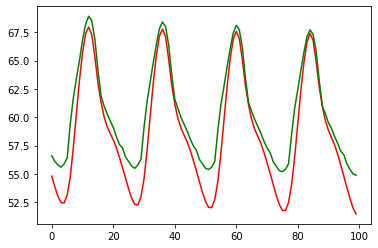

In [261]:
plot_predictions1(model4, X2_test, y2_test)

In [262]:
#add pressure and try to predict it at each time step
p_temp_df = pd.concat([df['HLY_DEWP_NORMAL'+location], temp_df], axis = 1)
p_temp_df.head()

,HLY_DEWP_NORMAL_SF,Hly_Normal,Day sin,Day cos,Year sin,Year cos
date,,,,,,
2019-01-01 00:00:00,43.2,48.8,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,43.1,48.5,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,42.6,47.6,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,42.3,47.2,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,42.2,46.8,8.660254e-01,0.500000,0.004888,0.999988


In [263]:
def df_to_X_y3(df, window_size= 7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0],df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)
        

In [264]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((8753, 7, 6), (8753, 2))

In [265]:
train_percent = 0.6
validation_percent = 0.2
test_percent = 0.2
train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
test_percent_split = int(test_percent * len(X))

X3_train, y3_train = X3[:train_percent_split], y3[:train_percent_split]
X3_val, y3_val = X3[train_percent_split:validation_percent_split], y3[train_percent_split:validation_percent_split]
X3_test, y3_test = X3[validation_percent_split:], y3[validation_percent_split:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((5253, 7, 6), (5253, 2), (1751, 7, 6), (1751, 2), (1749, 7, 6), (1749, 2))

In [266]:
p_training_mean3 = np.mean(X3_train[:,:,0])
p_training_std3 = np.mean(X3_train[:,:,0])

In [267]:
def preprocess3(X):
    X[:,:,0] = (X[:,:,0] - p_training_mean3)/p_training_std3
    X[:,:,1] = (X[:,:,1] - p_training_std3)/p_training_std3

def preprocess_output(y):
    y[:,0] = (y[:,0] - p_training_mean3)/p_training_std3
    y[:,1] = (y[:,1] - p_training_mean3)/p_training_std3
    return y

In [268]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [269]:
preprocess_output(X3_train)
preprocess_output(X3_val)
preprocess_output(X3_test)

array([[[-9.99035688e-01, -9.94544366e-01, -1.01808419e+00,
         -9.89559087e-01, -1.01988662e+00, -9.93630293e-01],
        [-9.98992083e-01, -9.94805996e-01, -1.01476568e+00,
         -9.85234319e-01, -1.01988205e+00, -9.93616041e-01],
        [ 5.24440442e-02,  2.36204115e-01, -5.00000000e-01,
          8.66025404e-01, -9.51902586e-01,  3.06400826e-01],
        ...,
        [ 4.61794964e-02,  2.06969559e-01, -1.32152666e-12,
          1.00000000e+00, -9.51462363e-01,  3.07765125e-01],
        [ 3.99149485e-02,  1.98616828e-01,  2.58819045e-01,
          9.65925826e-01, -9.51241518e-01,  3.08447037e-01],
        [ 3.15622180e-02,  1.81911367e-01,  5.00000000e-01,
          8.66025404e-01, -9.51020184e-01,  3.09128791e-01]],

       [[-9.98992083e-01, -9.94805996e-01, -1.01476568e+00,
         -9.85234319e-01, -1.01988205e+00, -9.93616041e-01],
        [-9.98904873e-01, -9.95067627e-01, -1.01044091e+00,
         -9.81915808e-01, -1.01987746e+00, -9.93601791e-01],
        [ 5.24440

In [270]:
model5 = Sequential()
model5.add(InputLayer((7,6))) #six time steps, 7 variables of input
model5.add(LSTM(64)) #how many windows do we want to slide across
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear')) #linear value, pos or neg (for temp)
model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                18176     
                                                                 
 dense_30 (Dense)            (None, 8)                 520       
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [271]:
cp5 = ModelCheckpoint(directory + 'model5/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model5.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.001), metrics = [RootMeanSquaredError()])


In [273]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs = 20, callbacks = [cp5])

Epoch 1/20
161/165 [============================>.] - ETA: 0s - loss: 5.7387 - root_mean_squared_error: 2.3956

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 4s 25ms/step - loss: 5.6926 - root_mean_squared_error: 2.3859 - val_loss: 17.7922 - val_root_mean_squared_error: 4.2181
Epoch 2/20
149/165 [==========================>...] - ETA: 0s - loss: 3.3808 - root_mean_squared_error: 1.8387

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 4s 22ms/step - loss: 3.3081 - root_mean_squared_error: 1.8188 - val_loss: 10.9045 - val_root_mean_squared_error: 3.3022
Epoch 3/20
165/165 [==============================] - 1s 4ms/step - loss: 2.1592 - root_mean_squared_error: 1.4694 - val_loss: 11.1000 - val_root_mean_squared_error: 3.3317
Epoch 4/20
160/165 [============================>.] - ETA: 0s - loss: 1.4975 - root_mean_squared_error: 1.2237

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 3s 21ms/step - loss: 1.4876 - root_mean_squared_error: 1.2197 - val_loss: 7.6709 - val_root_mean_squared_error: 2.7696
Epoch 5/20
165/165 [==============================] - 1s 4ms/step - loss: 1.0759 - root_mean_squared_error: 1.0372 - val_loss: 9.0993 - val_root_mean_squared_error: 3.0165
Epoch 6/20
165/165 [==============================] - 1s 4ms/step - loss: 0.8362 - root_mean_squared_error: 0.9145 - val_loss: 8.3851 - val_root_mean_squared_error: 2.8957
Epoch 7/20
165/165 [==============================] - 1s 4ms/step - loss: 0.6829 - root_mean_squared_error: 0.8264 - val_loss: 11.0801 - val_root_mean_squared_error: 3.3287
Epoch 8/20
165/165 [==============================] - 1s 4ms/step - loss: 0.6070 - root_mean_squared_error: 0.7791 - val_loss: 7.9218 - val_root_mean_squared_error: 2.8146
Epoch 9/20
165/165 [==============================] - 1s 4ms/step - loss: 0.5126 - root_mean_squared_error: 0.7160 - val_loss: 9.2812 - val_root_mean

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.3632 - root_mean_squared_error: 0.6027 - val_loss: 7.0129 - val_root_mean_squared_error: 2.6482
Epoch 12/20
165/165 [==============================] - 1s 4ms/step - loss: 0.3113 - root_mean_squared_error: 0.5580 - val_loss: 7.6589 - val_root_mean_squared_error: 2.7675
Epoch 13/20
153/165 [==========================>...] - ETA: 0s - loss: 0.2778 - root_mean_squared_error: 0.5271

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 4s 21ms/step - loss: 0.2799 - root_mean_squared_error: 0.5291 - val_loss: 5.9829 - val_root_mean_squared_error: 2.4460
Epoch 14/20
156/165 [===========================>..] - ETA: 0s - loss: 0.2508 - root_mean_squared_error: 0.5008

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 4s 27ms/step - loss: 0.2508 - root_mean_squared_error: 0.5008 - val_loss: 5.9716 - val_root_mean_squared_error: 2.4437
Epoch 15/20
160/165 [============================>.] - ETA: 0s - loss: 0.2437 - root_mean_squared_error: 0.4936

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 4s 23ms/step - loss: 0.2439 - root_mean_squared_error: 0.4939 - val_loss: 5.1375 - val_root_mean_squared_error: 2.2666
Epoch 16/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2232 - root_mean_squared_error: 0.4724 - val_loss: 5.6366 - val_root_mean_squared_error: 2.3741
Epoch 17/20
156/165 [===========================>..] - ETA: 0s - loss: 0.2198 - root_mean_squared_error: 0.4688

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model5/assets


165/165 [==============================] - 3s 21ms/step - loss: 0.2211 - root_mean_squared_error: 0.4702 - val_loss: 4.6176 - val_root_mean_squared_error: 2.1489
Epoch 18/20
165/165 [==============================] - 1s 5ms/step - loss: 0.2077 - root_mean_squared_error: 0.4557 - val_loss: 5.4169 - val_root_mean_squared_error: 2.3274
Epoch 19/20
165/165 [==============================] - 1s 5ms/step - loss: 0.1955 - root_mean_squared_error: 0.4421 - val_loss: 5.2138 - val_root_mean_squared_error: 2.2834
Epoch 20/20
165/165 [==============================] - 1s 4ms/step - loss: 0.1985 - root_mean_squared_error: 0.4455 - val_loss: 4.9077 - val_root_mean_squared_error: 2.2153


In [274]:
def plot_predictions2(model,X,y,start = 0, end =100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:,0], predictions[:,1]
    p_actuals, temp_actuals = y[:,0], y[:,1]
    df = pd.DataFrame(data = { 'Temperature predictions': temp_preds,
                                'Temperature Actuals': temp_actuals,
                                'Pressure Predictions': p_preds,
                                'Pressure Actuals': p_actuals
        
                            })
    plt.plot(df['Temperature predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

,Temperature predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,50.434006,56.1,47.743004,49.1
1,49.966244,55.8,47.473026,49.1
2,49.888027,55.6,47.393101,49.0
3,50.234951,55.9,47.514065,49.4
4,51.253647,56.4,47.963985,49.8
...,...,...,...,...
95,50.650162,55.9,47.459183,48.9
96,49.881290,55.4,47.040871,48.7
97,49.445316,55.0,46.789783,48.7
98,49.355297,54.9,46.707466,48.7


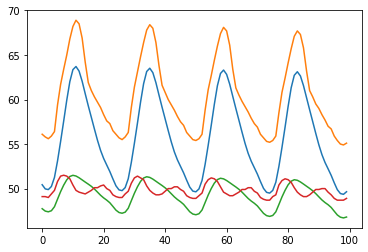

In [276]:
plot_predictions2(model5, X3_test, y3_test)

In [ ]:
# undo to figure out how we calculated predicted values
def postprocess_temp(arr):
    arr = (arr*temp_training_std3) + temp_training_mean3
    return arr